Name: Himanshu Aggarwal

Email: erhimanshuagarwal79@gmail.com

Assignment Name: Assignment_7_MODULE_11_KNN_&_PCA_ML_23102025.ipynb

Phone no.: 9711783242

## Question 1
**What is the fundamental idea behind ensemble techniques? How does bagging differ from boosting in terms of approach and objective?**


**Answer (concise):**
- **Fundamental idea:** Combine multiple base models (learners) to produce a single, generally better predictor than any individual model. Ensembles reduce variance, bias, or improve predictions by aggregating diverse opinions.
- **Bagging (Bootstrap Aggregating):** Build many independent models on bootstrap samples of the training data and average (regression) or majority-vote (classification). Objective: reduce variance and overfitting of high-variance models (e.g., decision trees). Base learners trained in parallel; each sees a random subset of data.
- **Boosting:** Sequentially build models where each new model focuses on the errors of the previous ensemble (reweighting instances or fitting residuals). Objective: reduce bias by combining many weak learners into a strong learner. Training is sequential and adaptive, which can reduce both bias and variance but is more prone to overfitting if uncontrolled.


## Question 2
**Explain how the Random Forest Classifier reduces overfitting compared to a single decision tree. Mention the role of two key hyperparameters in this process.**


**Answer (concise):**
- Random Forest trains many decision trees on bootstrap samples and averages their predictions. Averaging uncorrelated or weakly correlated trees reduces variance and thus overfitting that a single deep tree often exhibits.
- Two key hyperparameters:
  - `n_estimators`: number of trees. More trees typically reduce variance (to a point) and stabilize predictions.
  - `max_features`: number of features considered when looking for the best split. Smaller `max_features` increases tree diversity (reduces correlation between trees) and helps prevent overfitting. Typical values: `sqrt(n_features)` for classification.
- Additional controls: `max_depth`, `min_samples_leaf` which limit individual tree complexity and reduce overfitting further.


## Question 3
**What is Stacking in ensemble learning? How does it differ from traditional bagging/boosting methods? Provide a simple example use case.**


**Answer (concise):**
- **Stacking (stacked generalization):** Train multiple **level-0** models (diverse algorithms) on the training data. Then train a **meta-model** (level-1) on the predictions (often out-of-fold predictions) of level-0 models to learn how to best combine them.
- **Difference from bagging/boosting:** Bagging/boosting primarily combine many versions of the *same* (or similar) base learner — bagging in parallel, boosting sequentially. Stacking combines *different types* of models and uses a learned combiner (meta-learner) rather than simple averaging or weighted voting.
- **Example use case:** Tabular classification where you stack logistic regression, random forest, and gradient boosting as base models, and use a small neural network or logistic regression as the meta-learner to blend their outputs.


## Question 4
**What is the OOB Score in Random Forest, and why is it useful? How does it help in model evaluation without a separate validation set?**


**Answer (concise):**
- **OOB (Out-Of-Bag) score** uses the samples not included in a tree's bootstrap sample as a validation set for that tree. Since each tree is trained on roughly 63% of data (bootstrap), the remaining ~37% are OOB for that tree.
- To compute OOB predictions, each sample is predicted by all trees for which it was OOB; these predictions are aggregated to produce an OOB estimate of accuracy. This provides a nearly unbiased estimate of generalization performance without needing an explicit hold-out set—useful when data is limited.


## Question 5
**Compare AdaBoost and Gradient Boosting in terms of:**
- How they handle errors from weak learners
- Weight adjustment mechanism
- Typical use cases


**Answer (concise):**
- **AdaBoost:**
  - Errors handled by increasing the weights of misclassified samples; subsequent weak learners focus more on previously misclassified instances.
  - Weight adjustment: multiplicative increase/decrease of instance weights based on previous learner's performance; final prediction is a weighted majority vote of weak learners.
  - Use cases: simple binary classification tasks, when weak learners like shallow trees are appropriate. Sensitive to noisy labels/outliers.
- **Gradient Boosting (e.g., GradientBoostingRegressor/Classifier, XGBoost, LightGBM):**
  - Errors handled by fitting the next learner to the residuals (pseudo-residuals) of the current ensemble—an additive model optimized via gradient descent on a loss function.
  - Weight adjustment: not explicit instance weights per se (though some implementations use them); instead it uses gradients of the loss w.r.t predictions to guide the next learner.
  - Use cases: widespread — regression and classification problems, often outperform AdaBoost for complex tasks; highly customizable loss functions; modern implementations handle large data and categorical features (LightGBM/CatBoost/XGBoost).


## Question 6
**Why does CatBoost perform well on categorical features without requiring extensive preprocessing? Briefly explain its handling of categorical variables.**


**Answer (concise):**
- CatBoost uses **ordered target statistics** and **permutation-driven** schemes to compute numerical representations for categorical features while avoiding target leakage. It combines categorical values with the target via aggregated statistics computed in an order-respecting way, and optionally applies one-hot encoding for low-cardinality features.
- This reduces the need for heavy preprocessing (like manual target encoding or one-hot for many levels) and yields strong performance on datasets with many categorical features.


## Question 7: KNN Classifier Assignment: Wine Dataset Analysis with Optimization Task:
1. Load the Wine dataset (sklearn.datasets.load_wine()).
2. Split data into 70% train and 30% test.
3. Train a KNN classifier (default K=5) without scaling and evaluate using:
a. Accuracy
b. Precision, Recall, F1-Score (print classification report)
4. Apply StandardScaler, retrain KNN, and compare metrics.
5. Use GridSearchCV to find the best K (test K=1 to 20) and distance metric
(Euclidean, Manhattan).
6. Train the optimized KNN and compare results with the unscaled/scaled versions.

In [1]:
# Q7: Wine dataset KNN analysis (run this cell in your environment)
import numpy as np
import pandas as pd
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score

data = load_wine()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# 3. Train default KNN (k=5) without scaling
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print('Unscaled KNN Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report (Unscaled):')
print(classification_report(y_test, y_pred, zero_division=0))

# 4. Apply StandardScaler and retrain
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)
knn_s = KNeighborsClassifier(n_neighbors=5)
knn_s.fit(X_train_s, y_train)
y_pred_s = knn_s.predict(X_test_s)
print('Scaled KNN Accuracy:', accuracy_score(y_test, y_pred_s))
print('Classification Report (Scaled):')
print(classification_report(y_test, y_pred_s, zero_division=0))

# 5. GridSearchCV for K and metric
param_grid = {
    'n_neighbors': list(range(1, 21)),
    'metric': ['euclidean', 'manhattan']
}
grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train_s, y_train)
print('Best params (scaled training):', grid.best_params_)
best_knn = grid.best_estimator_
y_best = best_knn.predict(X_test_s)
print('Optimized KNN Accuracy:', accuracy_score(y_test, y_best))
print('Classification Report (Optimized):')
print(classification_report(y_test, y_best, zero_division=0))


Unscaled KNN Accuracy: 0.7222222222222222
Classification Report (Unscaled):
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        18
           1       0.78      0.67      0.72        21
           2       0.50      0.60      0.55        15

    accuracy                           0.72        54
   macro avg       0.72      0.72      0.72        54
weighted avg       0.74      0.72      0.73        54

Scaled KNN Accuracy: 0.9444444444444444
Classification Report (Scaled):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        18
           1       1.00      0.86      0.92        21
           2       0.83      1.00      0.91        15

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

Best params (scaled training): {'metric': 'euclidean', 'n_neighbors': 11}
Optimized KNN Ac

##Question 8 : PCA + KNN with Variance Analysis and Visualization Task:
1. Load the Breast Cancer dataset (sklearn.datasets.load_breast_cancer()).
2. Apply PCA and plot the scree plot (explained variance ratio).
3. Retain 95% variance and transform the dataset.
4. Train KNN on the original data and PCA-transformed data, then compare
accuracy.
5. Visualize the first two principal components using a scatter plot (color by class).


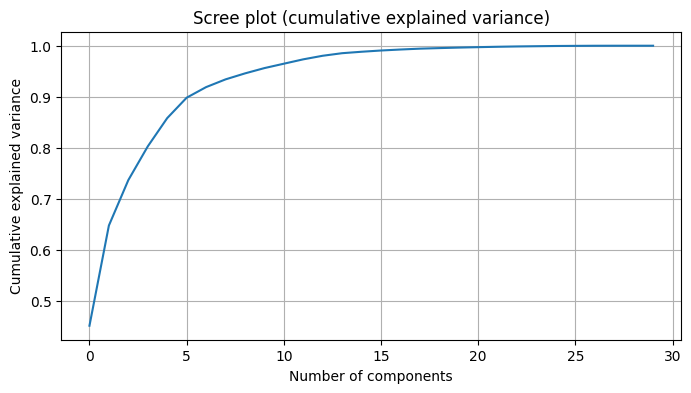

Original features: 30 -> PCA components to retain 95%: 10
KNN accuracy (scaled original): 0.9590643274853801
KNN accuracy (PCA 95%): 0.9532163742690059


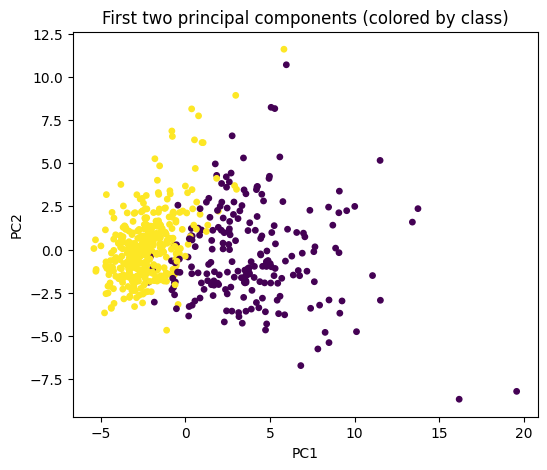

In [2]:
# Q8: PCA + KNN (run in your environment)
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)

# scale then PCA
scaler = StandardScaler()
X_train_s = scaler.fit_transform(X_train)
X_test_s = scaler.transform(X_test)

pca = PCA()
pca.fit(X_train_s)
explained = pca.explained_variance_ratio_

# Scree plot
plt.figure(figsize=(8,4))
plt.plot(np.cumsum(explained))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Scree plot (cumulative explained variance)')
plt.grid(True)
plt.show()

# Retain 95% variance
pca95 = PCA(n_components=0.95)
X_train_p = pca95.fit_transform(X_train_s)
X_test_p = pca95.transform(X_test_s)
print('Original features:', X.shape[1], '-> PCA components to retain 95%:', X_train_p.shape[1])

# Train KNN on original (scaled) and PCA-transformed
knn_orig = KNeighborsClassifier(n_neighbors=5)
knn_orig.fit(X_train_s, y_train)
acc_orig = accuracy_score(y_test, knn_orig.predict(X_test_s))
knn_pca = KNeighborsClassifier(n_neighbors=5)
knn_pca.fit(X_train_p, y_train)
acc_pca = accuracy_score(y_test, knn_pca.predict(X_test_p))
print('KNN accuracy (scaled original):', acc_orig)
print('KNN accuracy (PCA 95%):', acc_pca)

# Visualize first two principal components
pca2 = PCA(n_components=2)
X2 = pca2.fit_transform(np.vstack([X_train_s, X_test_s]))
y_all = np.concatenate([y_train, y_test])
plt.figure(figsize=(6,5))
plt.scatter(X2[:,0], X2[:,1], c=y_all, cmap='viridis', s=15)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('First two principal components (colored by class)')
plt.show()


##Question 9:KNN Regressor with Distance Metrics and K-Value analysis Task:
1. Generate a synthetic regression dataset
(sklearn.datasets.make_regression(n_samples=500, n_features=10)).
2. Train a KNN regressor with:
a. Euclidean distance (K=5)
b. Manhattan distance (K=5)
c. Compare Mean Squared Error (MSE) for both.
3. Test K=1, 5, 10, 20, 50 and plot K vs. MSE to analyze bias-variance tradeoff.


Metric=euclidean, MSE=4803.9056
Metric=manhattan, MSE=5210.2258


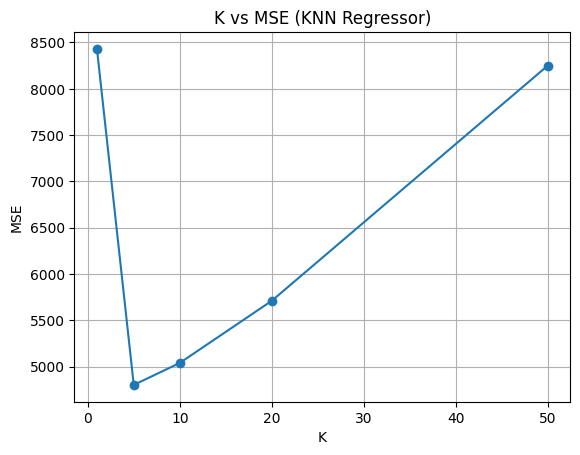

In [3]:
# Q9: KNN Regressor analysis (run in your environment)
import numpy as np
from sklearn.datasets import make_regression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

X, y = make_regression(n_samples=500, n_features=10, noise=10, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

for metric in ['euclidean', 'manhattan']:
    knn = KNeighborsRegressor(n_neighbors=5, metric=metric)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'Metric={metric}, MSE={mse:.4f}')

# K vs MSE
Ks = [1,5,10,20,50]
mses = []
for k in Ks:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    mses.append(mean_squared_error(y_test, y_pred))

plt.figure()
plt.plot(Ks, mses, marker='o')
plt.xlabel('K')
plt.ylabel('MSE')
plt.title('K vs MSE (KNN Regressor)')
plt.grid(True)
plt.show()


##Question 10: KNN with KD-Tree/Ball Tree, Imputation, and Real-World Data Task:
1. Load the Pima Indians Diabetes dataset (contains missing values).
2. Use KNN Imputation (sklearn.impute.KNNImputer) to fill missing values.
3. Train KNN using:
a. Brute-force method
b. KD-Tree
c. Ball Tree
4. Compare their training time and accuracy.
5. Plot the decision boundary for the best-performing method (use 2 most important features).
Dataset: Pima Indians Diabetes

Comparison (algorithm -> train_time, accuracy):
brute {'time': 0.007453441619873047, 'accuracy': 0.7186147186147186}
kd_tree {'time': 0.00197601318359375, 'accuracy': 0.7186147186147186}
ball_tree {'time': 0.0024335384368896484, 'accuracy': 0.7186147186147186}


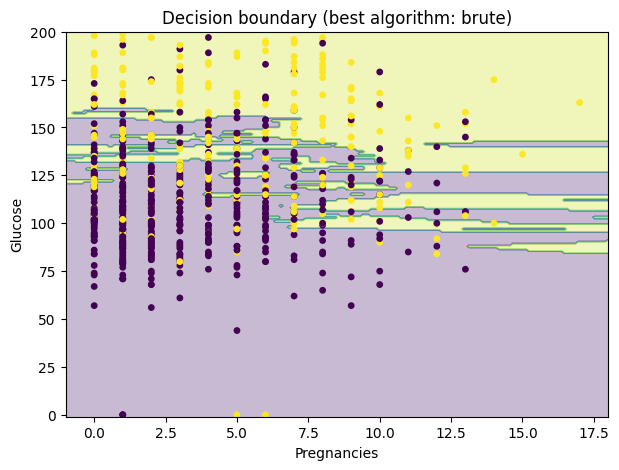

In [4]:
# Q10: KNN Imputation and KNN classifier comparison (run in your environment)
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import time
import matplotlib.pyplot as plt

# Dataset URL (run in notebook with internet access)
url = 'https://raw.githubusercontent.com/MasteriNeuron/datasets/refs/heads/main/diabetes.csv'
try:
    df = pd.read_csv(url)
except Exception as e:
    print('Could not download dataset automatically. Please download the CSV and place it locally, or run this notebook where internet is available.')
    # create a placeholder df structure if you want to run synthetic checks
    df = pd.DataFrame()

# If df is empty, stop here. Otherwise continue with imputation
if not df.empty:
    # assume target column name is 'Outcome' or similar — adjust as needed
    if 'Outcome' in df.columns:
        target_col = 'Outcome'
    elif 'Diabetes' in df.columns:
        target_col = 'Diabetes'
    else:
        # fallback: take last column as target
        target_col = df.columns[-1]

    X = df.drop(columns=[target_col])
    y = df[target_col]

    # KNN Imputer
    imputer = KNNImputer(n_neighbors=5)
    X_imp = imputer.fit_transform(X)

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X_imp, y, test_size=0.3, random_state=42, stratify=y)

    results = {}
    for algo in ['brute', 'kd_tree', 'ball_tree']:
        clf = KNeighborsClassifier(n_neighbors=5, algorithm=algo)
        t0 = time.time()
        clf.fit(X_train, y_train)
        t1 = time.time()
        acc = accuracy_score(y_test, clf.predict(X_test))
        results[algo] = {'time': t1 - t0, 'accuracy': acc}

    print('Comparison (algorithm -> train_time, accuracy):')
    for k,v in results.items():
        print(k, v)

    # Decision boundary: choose two most important features (here we pick first two for demo)
    feat_idx = [0,1]
    X2 = X_imp[:, feat_idx]
    X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y, test_size=0.3, random_state=42, stratify=y)
    best_algo = min(results.keys(), key=lambda a: -results[a]['accuracy'])
    clf_best = KNeighborsClassifier(n_neighbors=5, algorithm=best_algo)
    clf_best.fit(X2_train, y2_train)

    # plot decision boundary
    x_min, x_max = X2[:,0].min()-1, X2[:,0].max()+1
    y_min, y_max = X2[:,1].min()-1, X2[:,1].max()+1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    Z = clf_best.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7,5))
    plt.contourf(xx, yy, Z, alpha=0.3)
    plt.scatter(X2[:,0], X2[:,1], c=y, s=15)
    plt.xlabel(df.columns[feat_idx[0]])
    plt.ylabel(df.columns[feat_idx[1]])
    plt.title(f'Decision boundary (best algorithm: {best_algo})')
    plt.show()
